## Description About The Data

#### In the data, we have the following columns to work with :

1. Qualification: Qualification and degrees held by the doctor
2. Experience: Experience of the doctor (number of years)
3. Rating: Rating given by patients
4. Profile: Type of the doctor
5. Miscellaeous_Info: Extra information about the doctor
6. Place: Area and the city where the doctor is located
7. Fees: Fees charged by the doctor(Target)

In [1]:
# IMPORTING THE LIBRARY 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# IMPORT SOME PYTHON MODULE
import re
import warnings
warnings.filterwarnings('ignore')

# TRAIN DATA

In [3]:
# LOADING THE DATASET
df_train=pd.read_excel(r"C:\Users\Lenovo\Desktop\Data\Doctor consultant Fess Data\Final_Train.xlsx")
pd.set_option('display.max_columns',None)
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
# CHECKING THE NULL VALUE 
round(df_train.isnull().sum()/len(df_train)*100,2)

Qualification          0.00
Experience             0.00
Rating                55.39
Place                  0.42
Profile                0.00
Miscellaneous_Info    43.95
Fees                   0.00
dtype: float64

## EDA

### There will be lot's of analysis which can be assumed by observing our data as all the feature we are having is categorical even experience, except target variable(Fees) so let's begin..

#### Experiance Column

In [6]:
# Extract Experience Year from Experience column And convert it into Numeric

df_train['Experience'] = df_train['Experience'].str.split().str[0]
df_train['Experience'] = df_train['Experience'].astype(int)

In [7]:
df_train.head(2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350


#### Place Column 

* As, there are some missing values in Place column so I have replaced then with Unknown, Unknown to represent them.
* Then, we can easily extract city and locality from Place variable.

In [8]:
df_train['Place'].fillna('Unknown,Unknown',inplace=True)
df_train['Locality']=df_train['Place'].str.split(",").str[0]
df_train['City']    =df_train['Place'].str.split(",").str[1]

In [9]:
df_train.drop('Place',axis=1,inplace=True)
df_train.head(2)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore


#### Rating Column

* Rating has more then 50% of missing values so first we have to deal with them, so we will fill the rating with respect to Profile column having mean rating, then convert Rating to int.

In [10]:
# Fill the missing Values in Rating column with -1% to provide importance to missing value.
df_train['Rating'].fillna('-1',inplace=True)

In [11]:
# Now, Extract the actual value of Rating except '%' sign
df_train['Rating']=df_train['Rating'].apply(lambda x: str(x).replace('%','')).astype(int)

In [12]:
df_train.head(5)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City
0,"BHMS, MD - Homeopathy",24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,-1,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,-1,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [13]:
print("less than 0% :", len(df_train[df_train['Rating']<0]))
print(  "0-9% :", len(df_train[(df_train['Rating']>0)   & (df_train['Rating']<10)]))
print("10-19% :", len(df_train[(df_train['Rating']>=10) & (df_train['Rating']<=20)]))
print("20-29% :", len(df_train[(df_train['Rating']>=20) & (df_train['Rating']<=30)]))
print("30-39% :", len(df_train[(df_train['Rating']>=30) & (df_train['Rating']<=40)]))
print("40-49% :", len(df_train[(df_train['Rating']>=40) & (df_train['Rating']<=50)]))
print("50-59% :", len(df_train[(df_train['Rating']>=50) & (df_train['Rating']<=60)]))
print("60-69% :", len(df_train[(df_train['Rating']>=60) & (df_train['Rating']<=70)]))
print("70-79% :", len(df_train[(df_train['Rating']>=70) & (df_train['Rating']<=80)]))
print("80-89% :", len(df_train[(df_train['Rating']>=80) & (df_train['Rating']<=90)]))
print("90-99% :", len(df_train[(df_train['Rating']>=90) & (df_train['Rating']<=100)]))

less than 0% : 3302
0-9% : 1
10-19% : 0
20-29% : 0
30-39% : 4
40-49% : 4
50-59% : 19
60-69% : 39
70-79% : 102
80-89% : 299
90-99% : 2288


In [14]:
bins = [-1,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range (11)]
df_train['Rating'] = pd.cut(df_train['Rating'], bins=bins, labels=labels, include_lowest=True)

In [15]:
df_train['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

#### Qualification column

In [16]:
df_train['Qualification_count']=df_train['Qualification'].apply(lambda x: len(x.split(",")))
df_train['Qualification_count'].value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_count, dtype: int64

In [17]:
# max 10 equal is done by 1 doctor, let's have a look 
df_train[df_train['Qualification_count'] == 10]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City,Qualification_count
2035,"Fellowship in Oral implantlogy, Certified Adva...",22,10,Dentist,RCT - Root Canal Treatment Cosmetic/ Aesthetic...,300,Ashok Nagar,Chennai,10


In [18]:
df_train['Qualification'].nunique()

1420

* There are lot of Qualification but most of doctors only has 1 or 2 qualification.
* And the data is to much messy like, 'MBA -Healthcare' and ‘MBA’ which referred to same category so here we will take the top 10 Qualification that occurs the most.

In [19]:
# Dict of each Qualification with their counts
df_train['Qualification'] = df_train['Qualification'].str.split(",")
Qualification = {}

for x in df_train['Qualification'].values:
    for qual in x:
        qual = qual.strip()
        if qual in Qualification:
            Qualification[qual] += 1
        else:
            Qualification[qual] = 1

#print(Qualification)

In [20]:
# Extract Top 10 Qualification
most_qual = sorted(Qualification.items(), key=lambda x: x[1], reverse=True)[:10]
final_qual = []

for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [21]:
# Encode extracted top 10 qualification into train dataset as new column.
for qual in final_qual:
    df_train[qual] = 0
    
for x,y in zip(df_train['Qualification'].values, np.array([i for i in range(len(df_train))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df_train[c][y] = 1

In [22]:
# drop the column which are note required now,
df_train.drop(['Qualification','Qualification_count'],axis=1, inplace=True)

In [23]:
df_train.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


#### Interpretation

* Now, we can see that we are having top 10 Qual columns in our training set which are perfectly one-hot encoded. where there is 2 Qual from top 10 in that row two 1 are there, and it's correct. 

#### City Column

In [24]:
df_train['City'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Unknown',
       ' Sector 5', nan], dtype=object)

In [25]:
df_train['City'] = df_train['City'].apply (lambda x: re.sub(' +','',str(x)))

df_train['City'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Unknown                 25
Sector5                  1
nan                      1
Name: City, dtype: int64

In [26]:
df_train[(df_train['City'] == 'Sector5') | (df_train['City']== 'nan')]

,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
2169,11,0,Dentist,NaN,250,Dwarka,Sector5,0,1,0,0,0,0,0,0,0,0
3980,23,0,Dentist,NaN,250,e,nan,0,1,0,0,0,0,0,0,0,0


* whereever the locality is Dwarka the city is Delhi, and this Sector5 is area of that so it's misclassified here. which we have to correct.
* And where city is nan there we have to impute this to unknown in locality and city both.

In [27]:
df_train['City'] = np.where(df_train['City'] == 'Sector5', 'Delhi', df_train['City'])

df_train['Locality'][3980] = 'Unknown'
df_train['Locality'][3980] = 'Unknown'

In [28]:
df_train.groupby('City')['Locality'].nunique().reset_index()

,City,Locality
0,Bangalore,153
1,Chennai,124
2,Coimbatore,48
3,Delhi,200
4,Ernakulam,52
5,Hyderabad,135
6,Mumbai,115
7,Thiruvananthapuram,48
8,Unknown,1
9,nan,1


## Data Visualization & Categorical Encoding 
#### Before encoding a categorical variable, look at relationship of data with respect to target column To have better understand the data

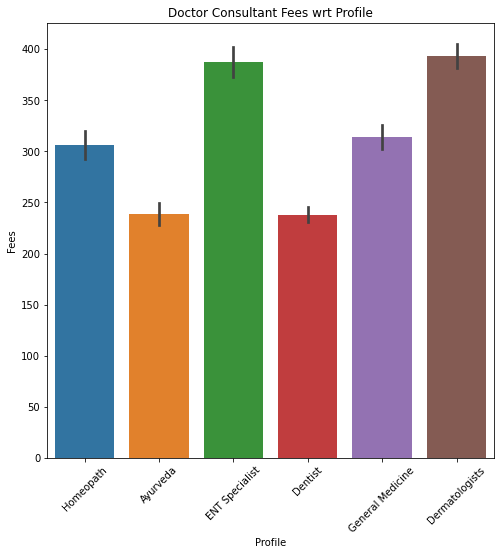

In [29]:
plt.figure(figsize=(8,8))
sns.barplot(x = 'Profile', y = 'Fees', data= df_train)
plt.title('Doctor Consultant Fees wrt Profile')
plt.xticks(rotation=45)
plt.show()

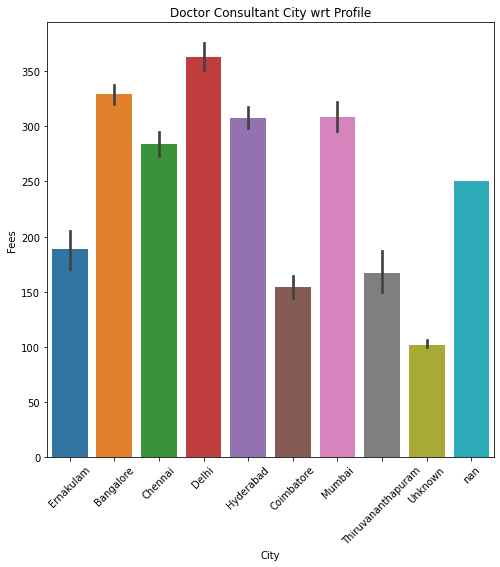

In [30]:
plt.figure(figsize=(8,8))
sns.barplot(x = 'City', y = 'Fees', data= df_train)
plt.title('Doctor Consultant City wrt Profile')
plt.xticks(rotation=45)
plt.show()

#### Observation
* As Delhi, Banglore, Hyderabad, Mumbai and Chennai are in list of Tier 1 city so, as usual the doctor consultation fees in these metripolean cities are very high as compared to Tier 2 and Tier 3 city.
* Doctor Fees with having profile as ENT Specialist and Dermatologist is very high then Homeopath and General medicine.

In [31]:
# ENCODE PROFILE AND CITY
df_train = pd.get_dummies(df_train, columns=['City','Profile'], prefix=['City','Profile'])

In [32]:
df_train.head()

,Experience,Rating,Miscellaneous_Info,Fees,Locality,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_Unknown,City_nan,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,12,10,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,9,0,NaN,300,Mathikere - BEL,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,12,0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,20,10,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [33]:
#change the name of some columns to use it in correct way.
df_train.rename(columns={'MD - Dermatology':'MD_Dermatology','MS - ENT':'MS_ENT','Venereology & Leprosy':'Venereology_Leprosy',
                      'MD - General Medicine':'MD_General_Medicine','Diploma in Otorhinolaryngology (DLO)':'Diploma_in_Otorhinolaryngology',
                      'MD - Homeopathy':'MD_Homeopathy','Profile_ENT Specialist':'Profile_ENT_Specialist',
                      'Profile_General Medicine':'Profile_General_Medicine'}, inplace=True)

#### Miscellaneous_Info & locality
* Miscellaneous_Info is to much messy column and it consist the data which we already have like doctor address(city & locality) and Rating
* locality and city are approximate have same relationship so better to move with only city
* so drop the Miscellaneous_Info and locality

In [34]:
df_train.drop(['Miscellaneous_Info','Locality'],axis=1,inplace=True)

In [35]:
df_train.head()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD_Dermatology,MS_ENT,Venereology_Leprosy,MD_General_Medicine,Diploma_in_Otorhinolaryngology,MD_Homeopathy,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_Unknown,City_nan,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT_Specialist,Profile_General_Medicine,Profile_Homeopath
0,24,10,100,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,12,10,350,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,9,0,300,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,12,0,250,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,20,10,250,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


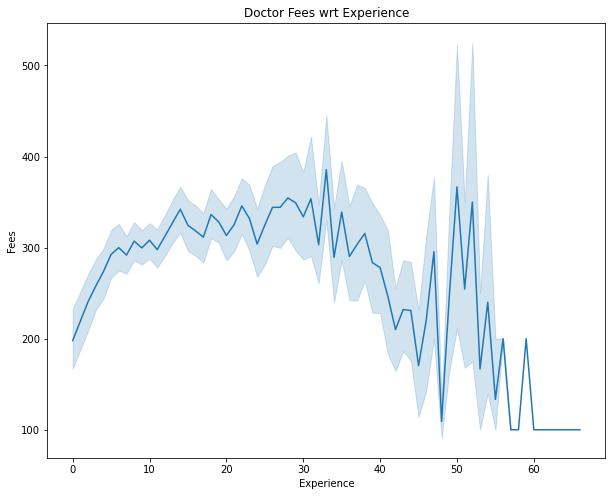

In [36]:
# Doctor Fees wrt to Experience
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Experience',y='Fees',data=df_train)
ax.set_title("Doctor Fees wrt Experience")
plt.show()

* most of us assumed that there is some association between the experience of the doctor and the fees they charged. Indeed there is, but it might not what we expect it to be. The average Fees increases from 25 years and is at peak near about 30 to 35. And Average Fees Decreases as there in further increase in Experience.

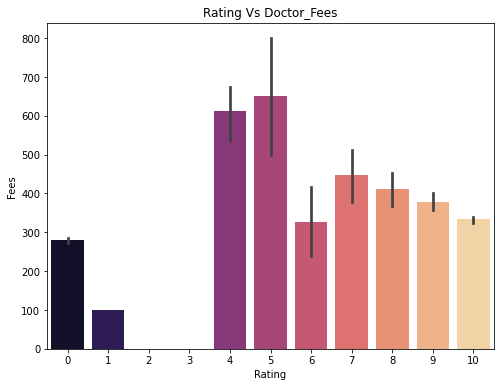

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(x='Rating',y='Fees',data=df_train, palette='magma')
plt.title("Rating Vs Doctor_Fees")
plt.show()

#### OBSERVATION
* the Rating is interesting column, we have grouped the rating in 10 bins, eg: bin5 will be rating of 40-49%.
* As, we can see that High rating does not relate to high fees charged(infact low fees can be reason of high rating) and where fees are charged so high, there rating is between 30-60%.
* The median of experience in bin 4 & 5 is 27 and 31 years respectively. whereas in highest rating of 10th bin the median experience is 14 years.

# TEST DATA

In [38]:
df_test=pd.read_excel(r"C:\Users\Lenovo\Desktop\Data\Doctor consultant Fess Data\Final_Test.xlsx")
pd.set_option('display.max_column', None)
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [40]:
round(df_test.isnull().sum()/len(df_test)*100,2)

Qualification          0.00
Experience             0.00
Rating                54.86
Place                  0.30
Profile                0.00
Miscellaneous_Info    41.97
dtype: float64

In [41]:
# EXPERIENCE COLUMN
df_test['Experience'] = df_test['Experience'].str.split().str[0]
df_test['Experience'] = df_test['Experience'].astype(int)

#Place column (Extract city and locality in diff column)
df_test['Place'].fillna('Unknown,Unknown',inplace=True)
df_test['locality'] = df_test['Place'].str.split(",").str[0]
df_test['city'] = df_test['Place'].str.split(",").str[1]
#drop place column
df_test.drop('Place',axis=1,inplace=True)

#Rating column
df_test['Rating'].fillna('-1%',inplace=True)
df_test['Rating'] = df_test['Rating'].str.slice(stop=-1).astype(int)

# group rating in 10 groups, missing_value to group 0
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [int(i) for i in range(11)]
df_test['Rating'] = pd.cut(df_test['Rating'], bins=bins, labels=labels, include_lowest=True)

In [42]:
# QUALIFICATION COLUMN
# dict of qualification with counts
# HERE the top 10 Qual of train and test col should be same so I am imputing the train col to test col

df_test['Qualification'] = df_test['Qualification'].str.split(",")
Qualification = {}
for x in df_test['Qualification']:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each] += 1
        else:
            Qualification[each] = 1
            
# finding out the top 10 Qualification
most_qual = sorted(Qualification.items(), key=lambda x:x[1], reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])

#encode the top 10 qualification in test dataset
for title in final_qual:
    df_test[title] = 0

for x,y in zip(df_test['Qualification'].values, np.array([i for i in range(len(df_test))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df_test[c][y] = 1
            
#drop Qualification after getting top 10 qual.
df_test.drop('Qualification',axis=1,inplace=True)


#city column
df_test['city'] = df_test['city'].apply(lambda x: re.sub(' +','',x))

#encode city and profile
df_test = pd.get_dummies(df_test, columns=['city','Profile'], prefix=['city','Profile'])

#drop Miscellaneous_Info and locality
df_test.drop(['Miscellaneous_Info','locality'], axis=1, inplace=True)

## Model Building

In [43]:
X=df_train.drop('Fees',axis=1)
y=df_train['Fees']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# To Use Our RMSLE We Will Create Our Own Scorer
from sklearn.metrics import make_scorer

In [46]:
def score(y_pred,y):
    y_pred=np.log(y_pred)
    y=np.log(y)
    return 1-((np.sum(( y_pred - y )**2)) / len(y))**1/2

# Scoring Function For Cross Validation
scorer=make_scorer(score_func=score,greater_is_better=True)

In [47]:
knn=KNeighborsRegressor()
svr=SVR(gamma='scale')
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()

In [48]:
for reg in(knn,svr,dtr,rfr):
    reg.fit(X_train,y_train)
    
    y_pred=reg.predict(X_test)
    
    print(reg, score(y_pred,y_test))

KNeighborsRegressor() 0.7724007761338937
SVR() 0.7729395963768292
DecisionTreeRegressor() 0.7071880624752186
RandomForestRegressor() 0.7689496089878485


In [49]:
from sklearn.ensemble import VotingRegressor
voting=VotingRegressor([('knn',knn),('svr',svr),('dtr',dtr),('rfr',rfr)])

voting.fit(X_train,y_train)

pred=voting.predict(X_test)

print('score:',score(pred,y_test))

score: 0.7839911076430577


In [53]:
# check with custom input.
fees = svr.predict([[10,10,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1]])
print(round(fees[0],2))

297.8


#### There is less parameter in Knn and after HyperParameter tuning the accuracy was 78.3. And after doing HyperParameter tuning of SVM the accuracy was 79.2. Thus, I move with RandomForest

## Hyperparameter Tunning Random Forest

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
# Hyperparameter tuning of RandomForest

#no. of tress random_forest
n_estimators = [int(x) for x in np.linspace(start=150,stop=1000,num=6)]
#max levels in tree
max_depth = [int(x) for x in np.linspace(start=6,stop=30,num=5)]
#min no. of splitting required to split a node
min_samples_split = [2,7,10]
#min no. of sample required at each leaf node
min_samples_leaf = [2,5,10]
#max_features
max_features=['auto','sqrt']

# generate a dictionary of all the Hyper Parameters
random_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features':max_features,
              }

print(random_grid)

{'n_estimators': [150, 320, 490, 660, 830, 1000], 'max_depth': [6, 12, 18, 24, 30], 'min_samples_split': [2, 7, 10], 'min_samples_leaf': [2, 5, 10], 'max_features': ['auto', 'sqrt']}


In [59]:
# Increase the n_iter for more accuracy.
rf_random = RandomizedSearchCV(rfr, param_distributions=random_grid, scoring=scorer, cv=5, n_iter=20, random_state=42, verbose=1, n_jobs=-1)

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 12, 18, 24, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [2, 7, 10],
                                        'n_estimators': [150, 320, 490, 660,
                                                         830, 1000]},
                   random_state=42, scoring=make_scorer(score), verbose=1)

In [60]:
rf_random.best_params_

{'n_estimators': 660,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 12}

In [61]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=660)

In [62]:
rf_reg = RandomForestRegressor(n_estimators= 490, min_samples_split= 10, min_samples_leaf= 5, max_features= 'sqrt', max_depth= 24)

rf_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=24, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=490)

In [63]:
my_pred=rf_reg.predict(X_test)
print('Score:',score(my_pred,y_test))

Score: 0.7858827366909993


In [65]:
# check with custom input.
fees = rf_reg.predict([[10,10,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1]])
print(round(fees[0],2))

355.82


## Save The Model For Later

In [66]:
import pickle

In [67]:
file = open('doctor_fees.pkl','wb')

#Dump The Model To The File
pickle.dump(rf_reg,file)

In [68]:
reg = pickle.load(open('doctor_fees.pkl','rb'))

In [69]:
y_pred=reg.predict(X_test)

print('Score:',score(y_pred,y_test))

Score: 0.7858827366909993


In [70]:
# check with custom input.
fees = reg.predict([[10,10,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1]])
print(round(fees[0],2))

355.82
